In [1]:
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
from functools import partial
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from srcs.utils import load_data

In [2]:
df = load_data()

# data preparation as used in Schelldorfer and Wüthrich (2019)
# drop ClaimNb >3
df = df[df["ClaimNb"] <= 3]

# drop exposure > 1 and < 0
df = df[(df["Exposure"] <= 1) & (df["Exposure"] > 0)]

# get frequency
df["Frequency"] = df["ClaimNb"] / df["Exposure"]

df

,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region,ClaimAmount,Frequency
IDpol,,,,,,,,,,,,,
1,1,0.10000,D,5,0,55,50,B12,Regular,1217,R82,0.0,10.000000
3,1,0.77000,D,5,0,55,50,B12,Regular,1217,R82,0.0,1.298701
5,1,0.75000,B,6,2,52,50,B12,Diesel,54,R22,0.0,1.333333
10,1,0.09000,B,7,0,46,50,B12,Diesel,76,R72,0.0,11.111111
11,1,0.84000,B,7,0,46,50,B12,Diesel,76,R72,0.0,1.190476
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6114326,0,0.00274,E,4,0,54,50,B12,Regular,3317,R93,0.0,0.000000
6114327,0,0.00274,E,4,0,41,95,B12,Regular,9850,R11,0.0,0.000000
6114328,0,0.00274,D,6,2,45,50,B12,Diesel,1323,R82,0.0,0.000000


In [3]:
# standardize column data types
# ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge','BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'ClaimAmount','Frequency'

# numerical float columns
numerical_float_cols = [
    "Exposure",
    "VehAge",
    "DrivAge",
    "BonusMalus",
    "Density",
    "ClaimAmount",
    "Frequency",
]

# numerical integer columns
numerical_int_cols = ["ClaimNb"]

# categorical columns
categorical_cols = ["Area", "VehPower", "VehBrand", "VehGas", "Region"]

# assert that all columns are covered
assert set(numerical_float_cols + numerical_int_cols + categorical_cols) == set(df.columns)

# set data types
df = df.astype({col: "category" for col in categorical_cols})
df = df.astype({col: "float64" for col in numerical_float_cols})
df = df.astype({col: "int64" for col in numerical_int_cols})

df.dtypes

ClaimNb           int64
Exposure        float64
Area           category
VehPower       category
VehAge          float64
DrivAge         float64
BonusMalus      float64
VehBrand       category
VehGas         category
Density         float64
Region         category
ClaimAmount     float64
Frequency       float64
dtype: object

In [4]:
interested_X_numerical = ["VehAge", "DrivAge", "BonusMalus", "Density"]
interested_X_categorical = ["Area", "VehPower", "VehBrand", "VehGas", "Region"]
interested_y = ["Frequency"]


# Continuous Variables vs Outcome

<Axes: xlabel='VehAge', ylabel='ClaimNb'>

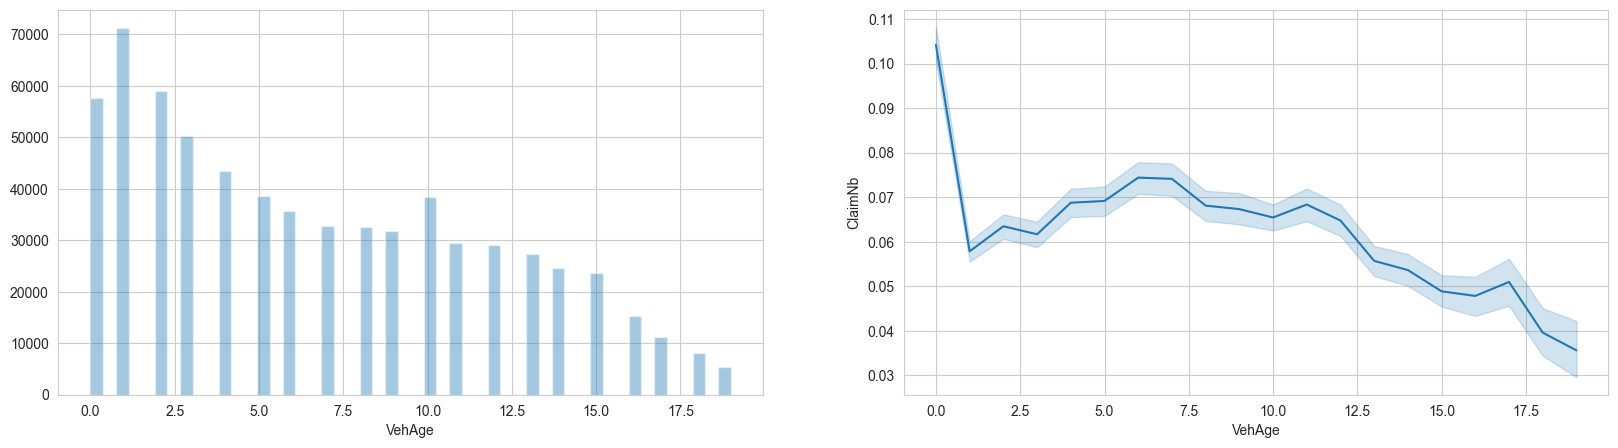

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df.loc[df["VehAge"] <= np.percentile(df["VehAge"], 97.5), "VehAge"], ax=axes[0], kde=False)

df.loc[df["VehAge"] <= np.percentile(df["VehAge"], 97.5)].pipe(sns.lineplot, x="VehAge", y="ClaimNb",
                                                               weights="Exposure", ax=axes[1])



<Axes: xlabel='DrivAge', ylabel='ClaimNb'>

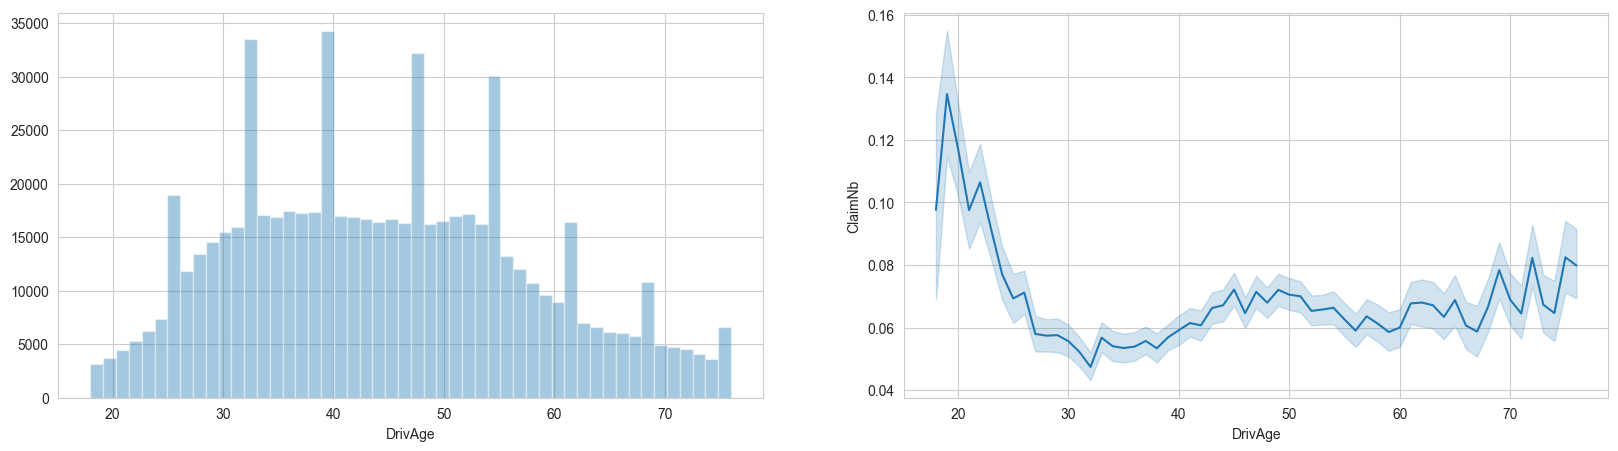

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df.loc[df["DrivAge"] <= np.percentile(df["DrivAge"], 97.5), "DrivAge"], ax=axes[0], kde=False)

df.loc[df["DrivAge"] <= np.percentile(df["DrivAge"], 97.5)].pipe(sns.lineplot, x="DrivAge", y="ClaimNb",
                                                                 weights="Exposure", ax=axes[1])

<Axes: xlabel='Density', ylabel='ClaimNb'>

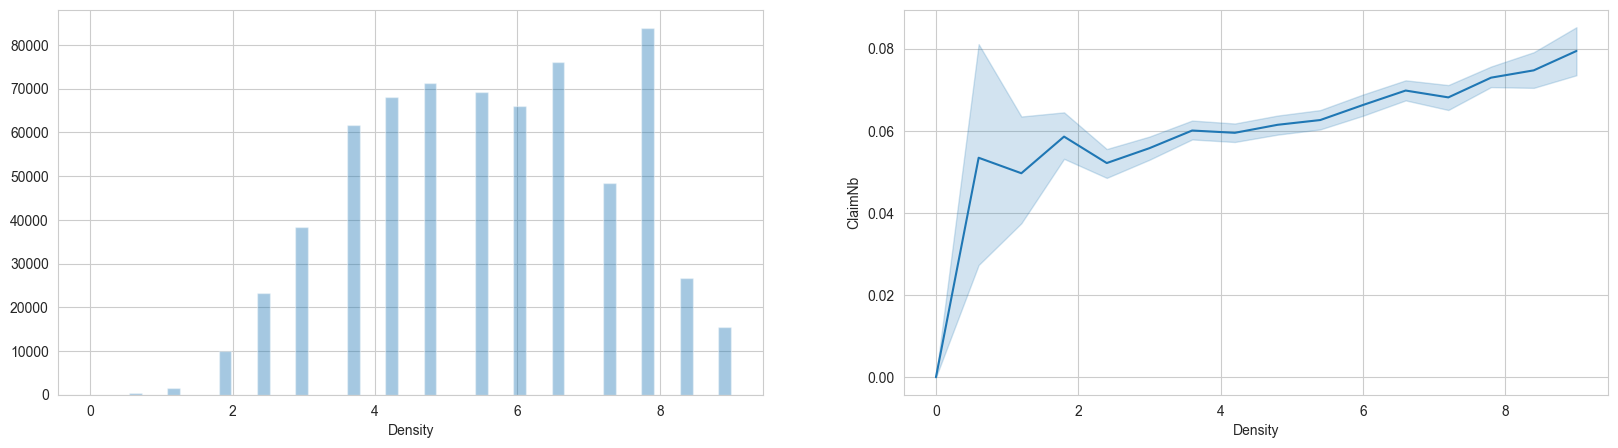

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(np.log(df.loc[df["Density"] <= np.percentile(df["Density"], 97.5), "Density"]) // 0.6 * 0.6, ax=axes[0],
             kde=False)
df.loc[df["Density"] <= np.percentile(df["Density"], 97.5)].assign(
    Density=lambda x: np.log(x["Density"]) // 0.6 * 0.6).pipe(
    sns.lineplot, x="Density", y="ClaimNb", weights="Exposure", ax=axes[1])

<Axes: xlabel='BonusMalus', ylabel='ClaimNb'>

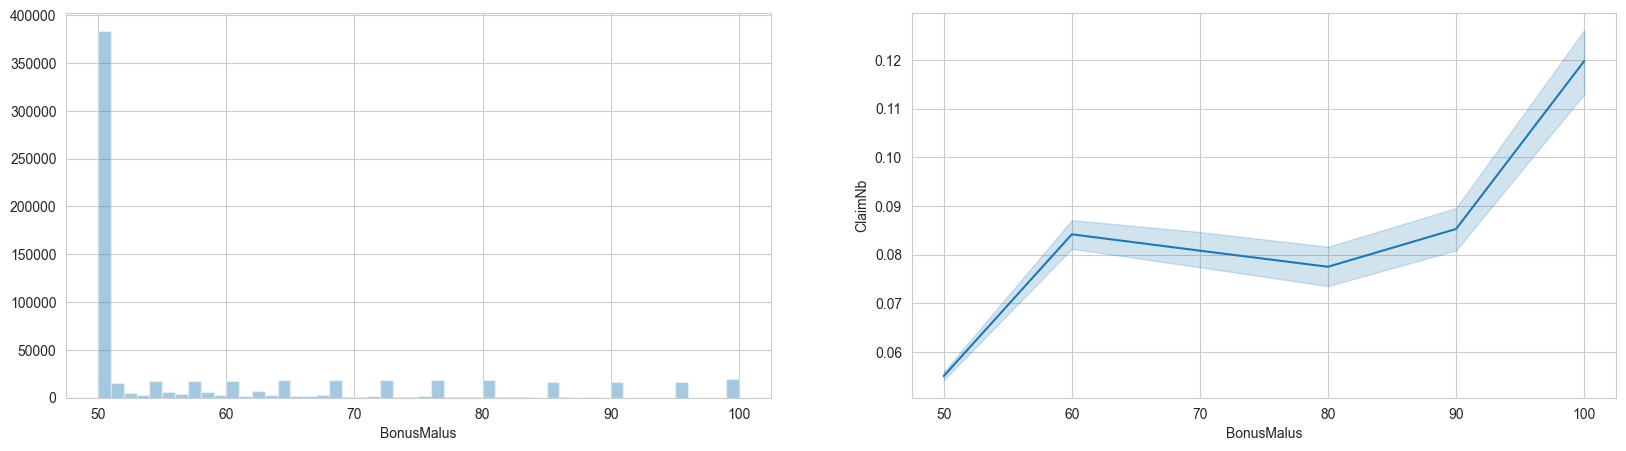

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(df.loc[df["BonusMalus"] <= np.percentile(df["BonusMalus"], 97.5), "BonusMalus"], ax=axes[0], kde=False)
df.loc[df["BonusMalus"] <= np.percentile(df["BonusMalus"], 97.5)].assign(
    BonusMalus=lambda x: x["BonusMalus"] // 10 * 10).pipe(sns.lineplot, x="BonusMalus", y="ClaimNb", weights="Exposure",
                                                          ax=axes[1])

<Axes: xlabel='VehAge', ylabel='ClaimNb'>

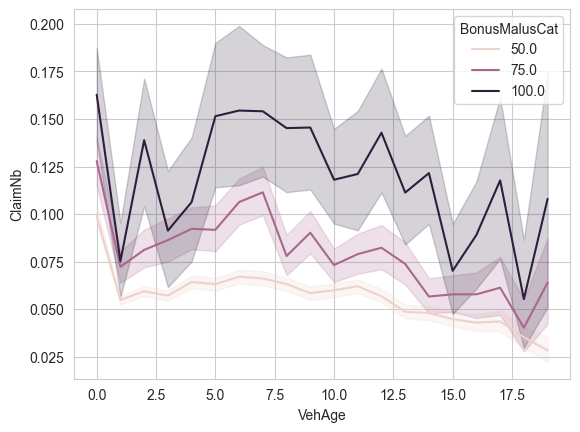

In [79]:
df.loc[(df["BonusMalus"] <= np.percentile(df["BonusMalus"], 97.5)) & (
        df["VehAge"] <= np.percentile(df["VehAge"], 97.5))].assign(
    BonusMalusCat=lambda x: x["BonusMalus"] // 25 * 25).pipe(sns.lineplot, x="VehAge", y="ClaimNb", weights="Exposure",
                                                             hue="BonusMalusCat")

<Axes: xlabel='DrivAge', ylabel='ClaimNb'>

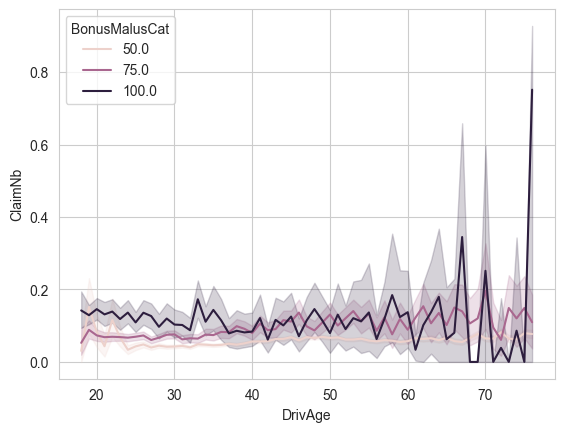

In [80]:
df.loc[(df["BonusMalus"] <= np.percentile(df["BonusMalus"], 97.5)) & (
        df["DrivAge"] <= np.percentile(df["DrivAge"], 97.5))].assign(
    BonusMalusCat=lambda x: x["BonusMalus"] // 25 * 25).pipe(sns.lineplot, x="DrivAge", y="ClaimNb", weights="Exposure",
                                                             hue="BonusMalusCat")

# Categorical Variables vs Outcome
## VehGas

<Axes: xlabel='BonusMalus', ylabel='ClaimNb'>

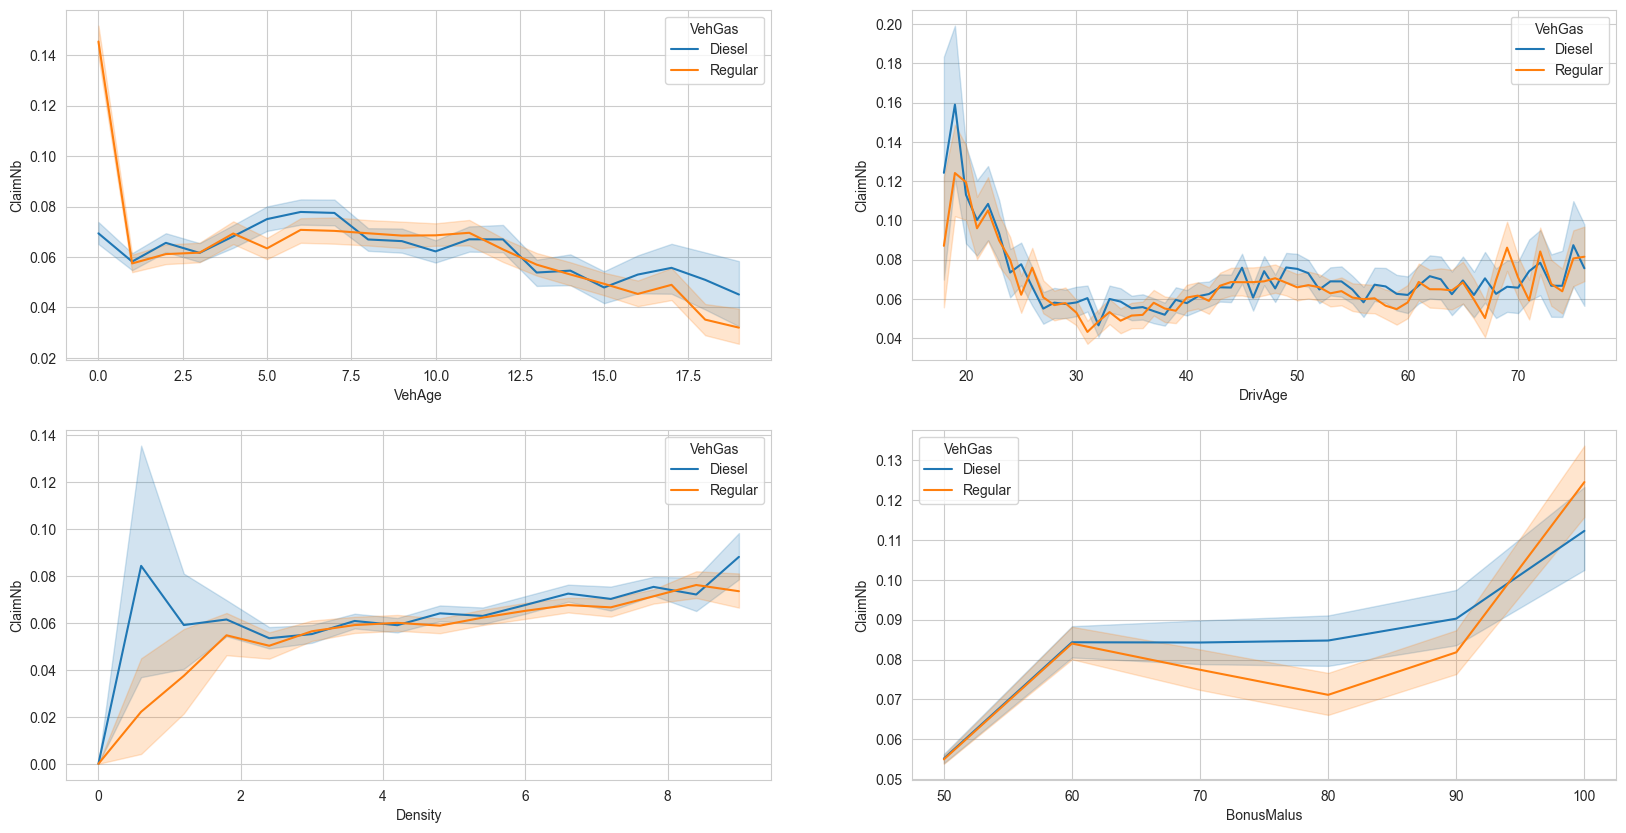

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

df.loc[df["VehAge"] <= np.percentile(df["VehAge"], 97.5)].pipe(sns.lineplot, x="VehAge", y="ClaimNb",
                                                               weights="Exposure", hue="VehGas", ax=axes[0][0])

df.loc[df["DrivAge"] <= np.percentile(df["DrivAge"], 97.5)].pipe(sns.lineplot, x="DrivAge", y="ClaimNb",
                                                                 weights="Exposure", hue="VehGas", ax=axes[0][1])

df.loc[df["Density"] <= np.percentile(df["Density"], 97.5)].assign(
    Density=lambda x: np.log(x["Density"]) // 0.6 * 0.6).pipe(sns.lineplot, x="Density", y="ClaimNb", hue="VehGas",
                                                              weights="Exposure", ax=axes[1][0])

df.loc[df["BonusMalus"] <= np.percentile(df["BonusMalus"], 97.5)].assign(
    BonusMalus=lambda x: x["BonusMalus"] // 10 * 10).pipe(sns.lineplot, x="BonusMalus", y="ClaimNb", weights="Exposure",
                                                          hue="VehGas",
                                                          ax=axes[1][1])

## VehPower

In [110]:
cat_col = "VehPower"
kbin = 6
bin_width = df[cat_col].unique().__len__() // kbin

tmp = df[[cat_col, "Frequency"]].groupby(cat_col).mean().sort_values("Frequency").reset_index().assign(
    rank=lambda x: x.index // bin_width).rename(columns={"rank": cat_col + "_rank"})
tmp


,VehPower,Frequency,VehPower_rank
0,13,0.106943,0
1,8,0.146587,0
2,14,0.218054,1
3,7,0.247782,1
4,6,0.255941,2
5,11,0.256115,2
6,12,0.260217,3
7,4,0.271525,3
8,15,0.274987,4
9,5,0.298898,4


<Axes: xlabel='BonusMalus', ylabel='ClaimNb'>

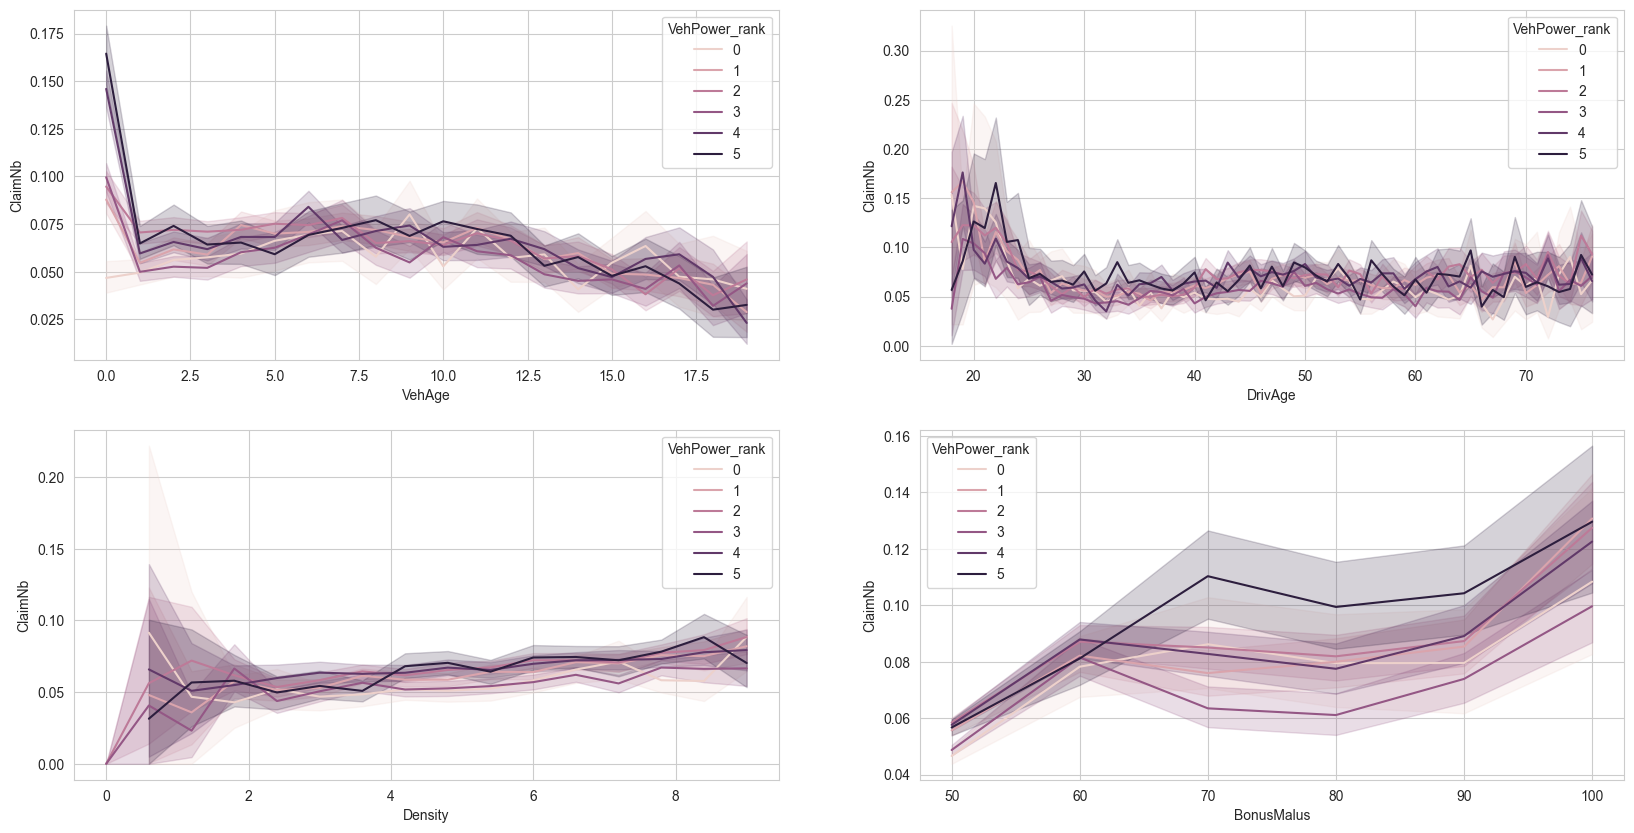

In [115]:
_df = df.merge(tmp[[cat_col, cat_col + "_rank"]], on=cat_col)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

_df.loc[_df["VehAge"] <= np.percentile(_df["VehAge"], 97.5)].pipe(sns.lineplot, x="VehAge", y="ClaimNb",
                                                               weights="Exposure", hue=cat_col + "_rank", ax=axes[0][0])

_df.loc[_df["DrivAge"] <= np.percentile(_df["DrivAge"], 97.5)].pipe(sns.lineplot, x="DrivAge", y="ClaimNb",
                                                                 weights="Exposure", hue=cat_col + "_rank", ax=axes[0][1])

_df.loc[_df["Density"] <= np.percentile(_df["Density"], 97.5)].assign(
    Density=lambda x: np.log(x["Density"]) // 0.6 * 0.6).pipe(sns.lineplot, x="Density", y="ClaimNb", hue=cat_col + "_rank",
                                                              weights="Exposure", ax=axes[1][0])

_df.loc[_df["BonusMalus"] <= np.percentile(_df["BonusMalus"], 97.5)].assign(
    BonusMalus=lambda x: x["BonusMalus"] // 10 * 10).pipe(sns.lineplot, x="BonusMalus", y="ClaimNb", weights="Exposure",
                                                          hue=cat_col + "_rank",
                                                          ax=axes[1][1])




## VehBrand

In [125]:
cat_col = "VehBrand"
kbin = 4
bin_width = df[cat_col].unique().__len__() // kbin

tmp = df[[cat_col, "Frequency"]].groupby(cat_col).mean().sort_values("Frequency").reset_index().assign(
    rank=lambda x: x.index // bin_width).rename(columns={"rank": cat_col + "_rank"})
tmp


,VehBrand,Frequency,VehBrand_rank
0,B14,0.149959,0
1,B11,0.160688,0
2,B2,0.175323,1
3,B1,0.184741,1
4,B4,0.192438,2
5,B13,0.195776,2
6,B10,0.197116,3
7,B5,0.198791,3
8,B6,0.201584,4
9,B3,0.235242,4


<Axes: xlabel='BonusMalus', ylabel='ClaimNb'>

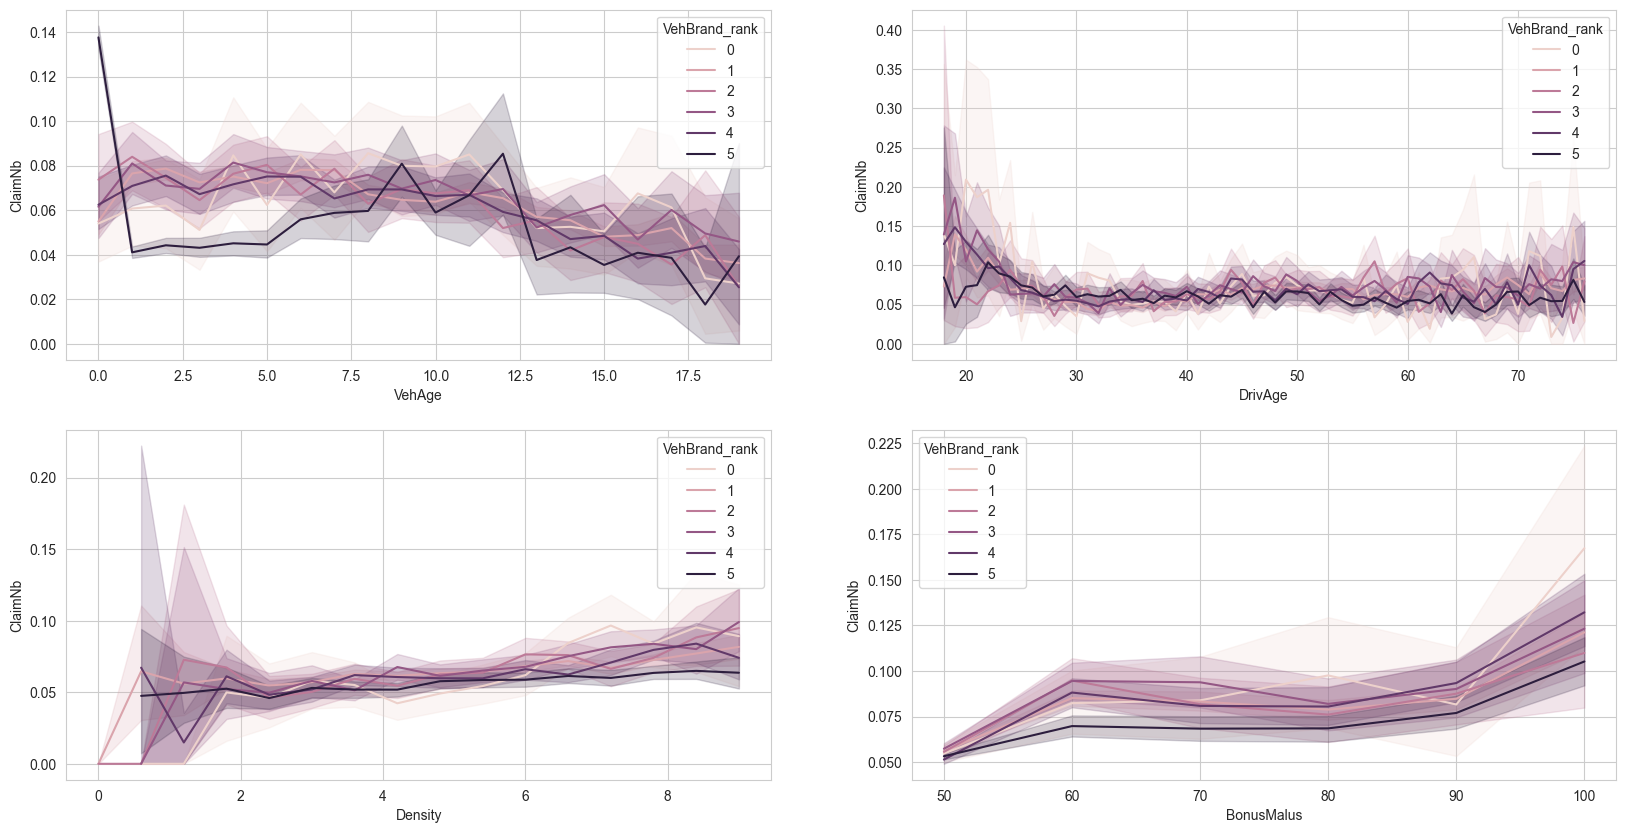

In [126]:
_df = df.merge(tmp[[cat_col, cat_col + "_rank"]], on=cat_col)

fig, axes = plt.subplots(2, 2, figsize=(20, 10))

_df.loc[_df["VehAge"] <= np.percentile(_df["VehAge"], 97.5)].pipe(sns.lineplot, x="VehAge", y="ClaimNb",
                                                               weights="Exposure", hue=cat_col + "_rank", ax=axes[0][0])

_df.loc[_df["DrivAge"] <= np.percentile(_df["DrivAge"], 97.5)].pipe(sns.lineplot, x="DrivAge", y="ClaimNb",
                                                                 weights="Exposure", hue=cat_col + "_rank", ax=axes[0][1])

_df.loc[_df["Density"] <= np.percentile(_df["Density"], 97.5)].assign(
    Density=lambda x: np.log(x["Density"]) // 0.6 * 0.6).pipe(sns.lineplot, x="Density", y="ClaimNb", hue=cat_col + "_rank",
                                                              weights="Exposure", ax=axes[1][0])

_df.loc[_df["BonusMalus"] <= np.percentile(_df["BonusMalus"], 97.5)].assign(
    BonusMalus=lambda x: x["BonusMalus"] // 10 * 10).pipe(sns.lineplot, x="BonusMalus", y="ClaimNb", weights="Exposure",
                                                          hue=cat_col + "_rank",
                                                          ax=axes[1][1])




# Insights and Questions
## Insights
- DrivAge and VehAge ARE VERY IMPORTANT, they have non-linear relationship with the outcome
- especially, the lowest values of DrivAge and VehAge have higher claim numbers,i.e. high order terms are important
- Regular VehGas and low VehAge=0 maybe a good interaction
- VehPower and VehAge have a non-linear relationship with the outcome
- VehPower = 15, 5, 9 ,10's new cars have higher claim numbers
- new cars and older drivers have higher BONUSMALUS  are more likely to have higher claim numbers



## Questions
- Why some VehAge values have so many?